In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_files/cities.csv"
logfile = "Output_Files/weather.log"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
in_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    in_city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if in_city not in in_cities:
        in_cities.append(in_city)

# Print the city count to confirm sufficient count
len(in_cities)

618

In [23]:
#in_cities = ["austin", "houston", "trontsrad;", "dallas", "fort worth"]
startmsg = "Begining Data Retrieval"
endmsg = "Data Retrieval Complete"
dashes = "-----------------------------"


In [28]:
out_cities = []   
count = 0
with open (logfile, "w") as f:
    print(startmsg + "\n" + dashes)
    f.write(startmsg + "\n" + dashes + "\n")
    for in_city in in_cities:
        r = requests.get("http://api.openweathermap.org/data/2.5/weather", params={
            "appid": api_key,
            "q": in_city,
            "units": "Imperial"
            })
        count += 1
        percentmsg = str('%.2f'%((count / len(in_cities)) * 100)) +"% Complete"
    
        if r.status_code == 200:
            out_city = r.json()
            out_cities.append(out_city)
            print("Processing Data for City: " + out_city["name"] + " | " + str(out_city["id"]) + " | " + percentmsg)
            f.write("Processing Data for City: " + out_city["name"] + " | " + str(out_city["id"]) \
                                    + " | " + percentmsg + "\n")

        else:
            print("*** City Not Found. Skipping | " + percentmsg + " ***")
            f.write("*** City Not Found. Skipping | " + percentmsg + " ***" + "\n") 
            break
    print(dashes + "\n" + endmsg + "\n" + dashes)
    f.write(dashes + "\n" + endmsg + "\n" + dashes + "\n")
    f.close()
    

Begining Data Retrieval
-----------------------------
Processing Data for City: Atuona | 4020109 | 0.16% Complete
Processing Data for City: Clyde River | 5924351 | 0.32% Complete
Processing Data for City: Touros | 3386213 | 0.49% Complete
Processing Data for City: Jamestown | 2069194 | 0.65% Complete
Processing Data for City: Butaritari | 2110227 | 0.81% Complete
Processing Data for City: Itupiranga | 3397851 | 0.97% Complete
Processing Data for City: Buraydah | 107304 | 1.13% Complete
Processing Data for City: Carnarvon | 1014034 | 1.29% Complete
Processing Data for City: Hambantota | 1244926 | 1.46% Complete
Processing Data for City: Puerto Ayora | 3652764 | 1.62% Complete
Processing Data for City: Busselton | 2075265 | 1.78% Complete
Processing Data for City: Sao Filipe | 3374210 | 1.94% Complete
Processing Data for City: Avarua | 4035715 | 2.10% Complete
Processing Data for City: Rikitea | 4030556 | 2.27% Complete
Processing Data for City: Turukhansk | 1488903 | 2.43% Complete
Proc

In [16]:
pd.DataFrame(out_cities)
cleaned_out_cities = [{
    "name": d["name"],
    "max temp": d["main"]["temp_max"],
    "cloudiness": (d["clouds"]["all"]),
    "country": d["sys"]["country"],
    "date": pd.to_datetime(d["dt"],unit='s'),
    "humidity": d["main"]["humidity"],
    "lat": d["coord"]["lat"],
    "long": d["coord"]["lon"],
    "wind spd": d["wind"]["speed"]
} for d in out_cities]
weather_data= pd.DataFrame(cleaned_out_cities)

weather_data.to_csv(output_data_file)

In [30]:
weather_data

,name,max temp,cloudiness,country,date,humidity,lat,long,wind spd
0,Atuona,79.77,79,PF,2020-01-06 04:54:09,77,-9.80,-139.03,11.95
1,Clyde River,-38.20,1,CA,2020-01-06 04:50:28,52,70.47,-68.59,16.11
2,Touros,78.80,40,BR,2020-01-06 04:53:05,83,-5.20,-35.46,3.36
3,Jamestown,75.81,84,AU,2020-01-06 04:54:10,49,-33.21,138.60,6.93
4,Butaritari,85.26,100,KI,2020-01-06 04:54:10,77,3.07,172.79,19.93
5,Itupiranga,73.40,90,BR,2020-01-06 04:54:10,100,-5.13,-49.33,3.36
6,Buraydah,39.20,0,SA,2020-01-06 04:55:47,86,26.33,43.97,4.76
7,Carnarvon,68.61,84,ZA,2020-01-06 04:54:11,58,-30.97,22.13,4.16
8,Hambantota,84.20,20,LK,2020-01-06 04:54:11,83,6.12,81.12,17.22
9,Puerto Ayora,75.99,3,EC,2020-01-06 04:54:11,82,-0.74,-90.35,7.00


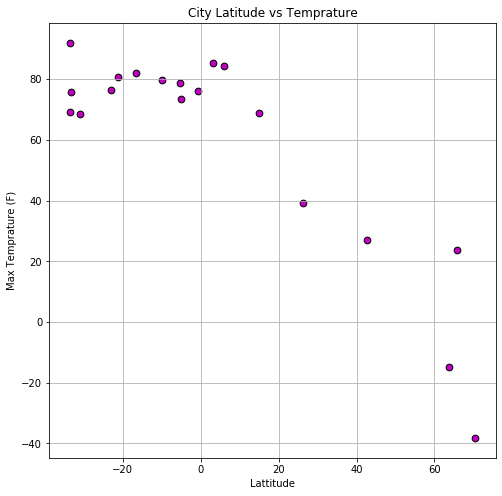

In [42]:
tempplt = weather_data.plot.scatter( x = "lat", y = "max temp", grid = True, figsize=(8,8), \
                                   s = 45, c = "m", edgecolors = "k", \
                                   title = "City Latitude vs Temprature"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Max Temprature (F)")
plt.savefig("Output_Files/Plots/LATvsTemp.png")
plt.show()

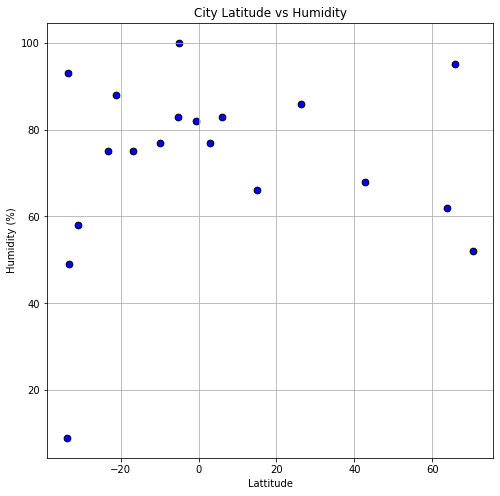

In [39]:
tempplt = weather_data.plot.scatter( x = "lat", y = "humidity", grid = True, figsize=(8,8), \
                                   s = 45, c = "b", edgecolors = "k", \
                                   title = "City Latitude vs Humidity"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Humidity (%)")
plt.savefig("Output_Files/Plots/LATvsHumidity.png")
plt.show()


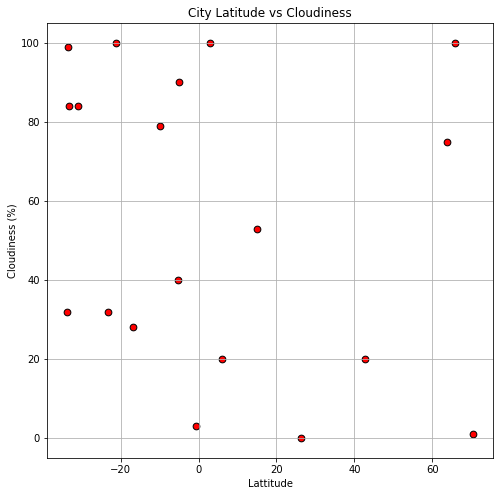

In [40]:
tempplt = weather_data.plot.scatter( x = "lat", y = "cloudiness", grid = True, figsize=(8,8), \
                                   s = 45, c = "r", edgecolors = "k", \
                                   title = "City Latitude vs Cloudiness"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Cloudiness (%)")
plt.savefig("Output_Files/Plots/LATvsCloud.png")
plt.show()

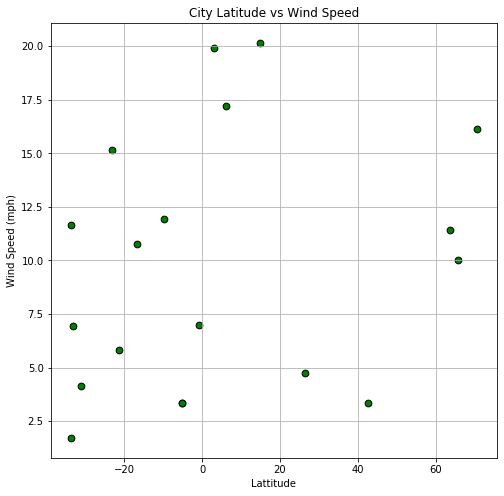

In [41]:
tempplt = weather_data.plot.scatter( x = "lat", y = "wind spd", grid = True, figsize=(8,8), \
                                   s = 45, c = "g", edgecolors = "k", \
                                   title = "City Latitude vs Wind Speed"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Wind Speed (mph)")
plt.savefig("Output_Files/Plots/LATvsWNDSPD.png")
plt.show()